In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('tcdml1920-rec-click-pred--training.csv')
df.head()

,recommendation_set_id,user_id,session_id,query_identifier,query_word_count,query_char_count,query_detected_language,query_document_id,document_language_provided,year_published,...,cbf_parser,search_title,search_keywords,search_abstract,time_recs_recieved,time_recs_displayed,time_recs_viewed,clicks,ctr,set_clicked
0,46897,\N,\N,Withheld for privacy,6,35,en,\N,\N,\N,...,standard_QP,yes,no,no,\N,\N,\N,0,0.0,0
1,46898,\N,\N,Withheld for privacy,9,53,en,\N,\N,\N,...,standard_QP,yes,no,no,\N,\N,\N,0,0.0,0
2,46899,\N,\N,Withheld for privacy,17,123,en,\N,\N,\N,...,edismax_QP,yes,yes,no,\N,\N,\N,0,0.0,0
3,46902,\N,\N,Withheld for privacy,14,100,en,\N,\N,\N,...,standard_QP,yes,no,no,\N,\N,\N,0,0.0,0
4,46903,\N,\N,Withheld for privacy,14,100,en,\N,\N,\N,...,edismax_QP,yes,yes,no,\N,\N,\N,0,0.0,0


In [163]:
df.info()
df['time_recs_viewed'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385687 entries, 0 to 385686
Data columns (total 46 columns):
recommendation_set_id               385687 non-null int64
user_id                             385687 non-null object
session_id                          385687 non-null object
query_identifier                    385687 non-null object
query_word_count                    385687 non-null object
query_char_count                    385687 non-null object
query_detected_language             385687 non-null object
query_document_id                   385687 non-null object
document_language_provided          385687 non-null object
year_published                      385687 non-null object
number_of_authors                   385687 non-null object
abstract_word_count                 385687 non-null object
abstract_char_count                 385687 non-null object
abstract_detected_language          385609 non-null object
first_author_id                     385687 non-null object
num_p

array(['\\N', '11/07/2019 16:01', '11/07/2019 16:48', ...,
       '14/10/2019 15:07', '14/10/2019 15:15', '14/10/2019 15:11'],
      dtype=object)

In [4]:
df.describe()

,recommendation_set_id,organization_id,hour_request_received,rec_processing_time,number_of_recs_in_set,clicks,ctr,set_clicked
count,385687.000000,385687.000000,385687.000000,385687.000000,385687.000000,385687.000000,385687.000000,385687.000000
mean,255927.413200,2.055848,12.796205,4.139454,5.832043,0.025285,0.004334,0.017535
std,119099.697905,1.777107,6.205718,61.643860,1.779673,0.233605,0.040158,0.131254
min,46897.000000,1.000000,0.000000,0.005667,1.000000,0.000000,0.000000,0.000000
25%,155516.500000,1.000000,9.000000,0.274834,3.000000,0.000000,0.000000,0.000000
50%,259046.000000,1.000000,13.000000,2.561020,7.000000,0.000000,0.000000,0.000000
75%,357939.500000,4.000000,18.000000,5.691500,7.000000,0.000000,0.000000,0.000000
max,459536.000000,8.000000,23.000000,17064.400000,7.000000,19.000000,2.714300,1.000000


In [165]:
df = pd.read_csv('tcdml1920-rec-click-pred--training.csv')
cols_to_drop = ['user_id','session_id']
new_df = df[df.columns.drop(cols_to_drop)]
print(new_df.head())

   recommendation_set_id      query_identifier query_word_count  \
0                  46897  Withheld for privacy                6   
1                  46898  Withheld for privacy                9   
2                  46899  Withheld for privacy               17   
3                  46902  Withheld for privacy               14   
4                  46903  Withheld for privacy               14   

  query_char_count query_detected_language query_document_id  \
0               35                      en                \N   
1               53                      en                \N   
2              123                      en                \N   
3              100                      en                \N   
4              100                      en                \N   

  document_language_provided year_published number_of_authors  \
0                         \N             \N                \N   
1                         \N             \N                \N   
2                

In [166]:
# print(new_df.algorithm_class.value_counts())
# print(new_df[(new_df['rec_processing_time']>38) & (new_df['clicks']>=1)].count())
new_df = new_df[(new_df['rec_processing_time']<38)]
new_df = new_df.replace('\\N',np.nan)

df1 = new_df[new_df['algorithm_class']== 'content_based_filtering']
df2 = new_df[new_df['algorithm_class']== 'sentence_embeddings']
df3 = new_df[new_df['algorithm_class']== 'unknown']
df4 = new_df[new_df['algorithm_class']== 'stereotype']
df5 = new_df[new_df['algorithm_class']== 'same_author']
df6 = new_df[new_df['algorithm_class']== 'random']

new_df['rec_processing_time'].value_counts()
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 385445 entries, 0 to 385686
Data columns (total 44 columns):
recommendation_set_id               385445 non-null int64
query_identifier                    385291 non-null object
query_word_count                    385291 non-null object
query_char_count                    385291 non-null object
query_detected_language             381848 non-null object
query_document_id                   165156 non-null object
document_language_provided          4424 non-null object
year_published                      69920 non-null object
number_of_authors                   69216 non-null object
abstract_word_count                 146768 non-null object
abstract_char_count                 146768 non-null object
abstract_detected_language          146690 non-null object
first_author_id                     66398 non-null object
num_pubs_by_first_author            66398 non-null object
organization_id                     385445 non-null int64
application_

In [143]:
print(df1.describe())
print(df1.isnull().sum())

       recommendation_set_id  organization_id  hour_request_received  \
count          274854.000000    274854.000000          274854.000000   
mean           245109.528932         2.046235              12.779454   
std            116819.224104         1.770811               6.200778   
min             46897.000000         1.000000               0.000000   
25%            148029.250000         1.000000               9.000000   
50%            245343.500000         1.000000              13.000000   
75%            337447.500000         4.000000              18.000000   
max            459535.000000         8.000000              23.000000   

       rec_processing_time  number_of_recs_in_set         clicks  \
count        274854.000000          274854.000000  274854.000000   
mean              4.264812               5.831321       0.026665   
std               5.037270               1.781479       0.240621   
min               0.006282               1.000000       0.000000   
25%        

In [135]:
# cols_to_drop = ['user_id','session_id','time_recs_recieved','time_recs_displayed','time_recs_viewed','document_language_provided','query_document_id','abstract_detected_language']
# new_df = df[df.columns.drop(cols_to_drop)]
# new_df = df
df = pd.read_csv('tcdml1920-rec-click-pred--training.csv')
cols_to_drop = ['user_id','session_id']
new_df = df[df.columns.drop(cols_to_drop)]
print(new_df.head())
new_df = new_df.replace('\\N',np.nan)
new_df = new_df[(new_df['rec_processing_time']<38)]
# print(new_df.head())
new_df.isnull().sum()

   recommendation_set_id      query_identifier query_word_count  \
0                  46897  Withheld for privacy                6   
1                  46898  Withheld for privacy                9   
2                  46899  Withheld for privacy               17   
3                  46902  Withheld for privacy               14   
4                  46903  Withheld for privacy               14   

  query_char_count query_detected_language query_document_id  \
0               35                      en                \N   
1               53                      en                \N   
2              123                      en                \N   
3              100                      en                \N   
4              100                      en                \N   

  document_language_provided year_published number_of_authors  \
0                         \N             \N                \N   
1                         \N             \N                \N   
2                

recommendation_set_id                    0
query_identifier                       154
query_word_count                       154
query_char_count                       154
query_detected_language               3597
query_document_id                   220289
document_language_provided          381021
year_published                      315525
number_of_authors                   316229
abstract_word_count                 238677
abstract_char_count                 238677
abstract_detected_language          238755
first_author_id                     319047
num_pubs_by_first_author            319047
organization_id                          0
application_type                         0
item_type                            36223
request_received                         0
hour_request_received                    0
response_delivered                       0
rec_processing_time                      0
app_version                         115525
app_lang                             16695
user_os    

In [146]:
# print(df['recommendation_set_id'].value_counts())
count_df = (new_df.groupby(['algorithm_class'])['set_clicked'].sum()).reset_index()
count_df.sort_values("set_clicked", inplace=True, ascending=False)
count_df
# new_df['set_clicked'].value_counts()
# new_df['country_by_ip'].value_counts()

,algorithm_class,set_clicked
0,content_based_filtering,5066
3,sentence_embeddings,1275
5,unknown,297
4,stereotype,67
2,same_author,56
1,random,2


In [6]:
# new_df = new_df[['query_identifier','query_word_count','query_char_count','query_detected_language','organization_id',
#                 'application_type','item_type','hour_request_received','country_by_ip','algorithm_class','search_title','search_keywords','search_abstract',
#                 'clicks','ctr','set_clicked']]
df = pd.read_csv('tcdml1920-rec-click-pred--training.csv')
cols_to_drop = ['user_id','session_id']
new_df = df[df.columns.drop(cols_to_drop)]
# print(new_df.head())
new_df = new_df.replace('\\N',np.nan)
# print(new_df.head())
new_df = new_df[(new_df['rec_processing_time']<38)]
new_df.isnull().sum()
new_df = new_df[['query_identifier','query_word_count','query_char_count','query_detected_language','organization_id',
                'application_type','item_type','hour_request_received','country_by_ip','algorithm_class','search_abstract','cbf_parser',
                'clicks','ctr','set_clicked']]

# new_df = new_df[['query_identifier','query_word_count','query_char_count','query_detected_language','organization_id',
#                 'application_type','item_type','hour_request_received','rec_processing_time','country_by_ip',
#                 'number_of_recs_in_set','algorithm_class','search_title','search_keywords','search_abstract',
#                 'clicks','ctr','set_clicked']]
print(new_df.head())

new_df = new_df[new_df['ctr']<=1]

In [80]:
count_df = (new_df.groupby(['item_type'])['set_clicked'].sum()).reset_index()
count_df.sort_values("set_clicked", inplace=True, ascending=False)
count_df
# count_df[count_df['query_detected_language'].isnull()]

,item_type,set_clicked
10,academic_publication,5516
6,Music making & pedals,331
4,Hard drives & NAS,158
11,article,146
0,DAB & audio,88
2,Everything else,88
5,Home entertainment,45
7,Networking,35
1,DVD players,10
8,Photo & frames,10


In [8]:
def featureEngineering(newdf):
    clean_df = newdf.copy()
    clean_df['query_identifier'].fillna('unknown', inplace=True)
#     print(clean_df['query_word_count'].isnull().sum())
    clean_df['query_word_count'].fillna('unknown', inplace=True)
    clean_df['query_word_count'].isnull().sum()
#     print(clean_df['query_char_count'].isnull().sum())
    clean_df['query_char_count'].fillna('unknown', inplace=True)
    clean_df['query_char_count'].isnull().sum()
#     print(clean_df['country_by_ip'].isnull().sum())
    clean_df['country_by_ip'].fillna('unknown', inplace=True)
    clean_df['country_by_ip'].isnull().sum()
#     print(clean_df['query_detected_language'].isnull().sum())
    clean_df['query_detected_language'] = clean_df.groupby(["country_by_ip"])['query_detected_language'].apply(lambda x: x.fillna(x.mode()[0]))
#     print(clean_df['query_detected_language'].isnull().sum())
    clean_df['query_detected_language'].fillna('unknown', inplace=True)
    clean_df[clean_df['query_detected_language'].isnull()]
#     print(clean_df['item_type'].isnull().sum())
    clean_df['item_type'].fillna('unknown', inplace=True)
    clean_df[clean_df['item_type'].isnull()]
#     print(clean_df['organization_id'].value_counts())
    clean_df['cbf_parser'].fillna('unknown', inplace=True)
    clean_df[clean_df['cbf_parser'].isnull()]

    # Target Encoding
    clean_df['query_identifier'] = clean_df['query_identifier'].map(clean_df.groupby('query_identifier')['set_clicked'].mean())
    clean_df['query_word_count'] = clean_df['query_word_count'].map(clean_df.groupby('query_word_count')['set_clicked'].mean())
    clean_df['query_char_count'] = clean_df['query_char_count'].map(clean_df.groupby('query_char_count')['set_clicked'].mean())
    clean_df['country_by_ip'] = clean_df['country_by_ip'].map(clean_df.groupby('country_by_ip')['set_clicked'].mean())
    clean_df['query_detected_language'] = clean_df['query_detected_language'].map(clean_df.groupby('query_detected_language')['set_clicked'].mean())
    clean_df['item_type'] = clean_df['item_type'].map(clean_df.groupby('item_type')['set_clicked'].mean())
    clean_df['hour_request_received'] = clean_df['hour_request_received'].map(clean_df.groupby('hour_request_received')['set_clicked'].mean())
    clean_df['application_type'] = clean_df['application_type'].map(clean_df.groupby('application_type')['set_clicked'].mean())
    clean_df['algorithm_class'] = clean_df['algorithm_class'].map(clean_df.groupby('algorithm_class')['set_clicked'].mean())
    clean_df['cbf_parser'] = clean_df['cbf_parser'].map(clean_df.groupby('cbf_parser')['set_clicked'].mean())
#     clean_df['search_title'] = clean_df['search_title'].map(clean_df.groupby('search_title')['set_clicked'].mean())
#     clean_df['search_keywords'] = clean_df['search_keywords'].map(clean_df.groupby('search_keywords')['set_clicked'].mean())
    clean_df['search_abstract'] = clean_df['search_abstract'].map(clean_df.groupby('search_abstract')['set_clicked'].mean())
#     clean_df['number_of_recs_in_set'] = clean_df['number_of_recs_in_set'].map(clean_df.groupby('number_of_recs_in_set')['set_clicked'].mean())
    clean_df['organization_id'] = clean_df['organization_id'].map(clean_df.groupby('organization_id')['set_clicked'].mean())
#     print(clean_df.head())
    return clean_df

In [157]:
import sklearn
x=new_df
y=new_df.iloc[:,-1]
# print(x.head())
print(len(y))
# print(np.isfinite(x).sum())
# print(x['set_clicked'])
# print(y.head())
# print(x.isnull())
from sklearn.model_selection import train_test_split
x_0 = new_df[new_df['set_clicked']==0]
print(len(x_0))
y_0 = x_0.iloc[:,-1]
print(len(y_0))
x_1 = new_df[new_df['set_clicked']==1]
y_1 = x_1.iloc[:,-1]

x_train_0,x_test_0,y_train_0,y_test_0=train_test_split(x_0,y_0,test_size=.25,random_state=5)
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_1,y_1,test_size=.25,random_state=5)
x_train = pd.concat([x_train_0,x_train_1])
x_test = pd.concat([x_test_0,x_test_1])
y_train = pd.concat([y_train_0,y_train_1])
y_test = pd.concat([y_test_0,y_test_1])

x_train_original = x_train.copy()
print(x_train_original.head())
x_train = featureEngineering(x_train).iloc[:,:-3]
x_test = featureEngineering(x_test).iloc[:,:-3]
print(x_train_original.head())
print(len(x_train))
print(len(y_train))
# print(x_train['query_identifier'].unique())
# print(x_train.head())

385413
378682
378682
                                         query_identifier query_word_count  \
7929                                 Withheld for privacy                9   
179480  MXR Graphic EQ 10 Band EQ Compatible Power Sup...               10   
324626                               Withheld for privacy               19   
308964                               Withheld for privacy                6   
198096                               Withheld for privacy                5   

       query_char_count query_detected_language  organization_id  \
7929                 62                      en                1   
179480               62                      en                4   
324626              143                      en                1   
308964               52                      en                1   
198096               36                      en                1   

       application_type             item_type  hour_request_received  \
7929    digital_library  acad

In [158]:
print(x_train.isnull().sum())

query_identifier           0
query_word_count           0
query_char_count           0
query_detected_language    0
organization_id            0
application_type           0
item_type                  0
hour_request_received      0
country_by_ip              0
algorithm_class            0
search_abstract            0
cbf_parser                 0
dtype: int64


In [38]:
from sklearn.ensemble import RandomForestClassifier

# # train model
# rfc = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)

# # predict on test set
# rfc_pred = rfc.predict(x_test)

print(sklearn.metrics.accuracy_score(y_test, rfc_pred))

print(sklearn.metrics.f1_score(y_test, rfc_pred))

print(sklearn.metrics.recall_score(y_test, rfc_pred))

print(sklearn.metrics.precision_score(y_test, rfc_pred))

0.9824610533739914
0.08047852093529091
0.043969102792632206
0.47435897435897434


In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, ratio=1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)
smote = LogisticRegression(solver='liblinear').fit(x_train, y_train)

smote_pred = smote.predict(x_test)

# Checking accuracy
print(sklearn.metrics.accuracy_score(y_test, smote_pred))

# f1 score
print(sklearn.metrics.f1_score(y_test, smote_pred))

print(sklearn.metrics.recall_score(y_test, smote_pred))
print(sklearn.metrics.precision_score(y_test,smote_pred))

0.6188105461862385
0.06569046166361603
0.7676767676767676
0.03431333492683186


In [159]:
from sklearn.utils import resample
X = pd.concat([x_train, y_train], axis=1)
print(X.head())
# separate minority and majority classes
x_0 = X[X['set_clicked']==0]
x_1 = X[X['set_clicked']==1]

# upsample minority
x_1_upsampled = resample(x_1,
                          replace=True, # sample with replacement
                          n_samples=len(x_0), # match number in majority class
                          random_state=27) # reproducible results

# x_0_downsampled = resample(x_0,
#                                 replace = False, # sample without replacement
#                                 n_samples = len(x_1), # match minority n
#                                 random_state = 27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([x_0, x_1_upsampled])

# downsampled = pd.concat([x_0_downsampled, x_1])

# check new class counts
# print(downsampled['set_clicked'].value_counts())
print(upsampled['set_clicked'].value_counts())
# print(upsampled.head())

y_train = upsampled.iloc[:,-1]
x_train = upsampled.iloc[:,:-1]

# y_train = downsampled.iloc[:,-1]
# x_train = downsampled.iloc[:,:-1]

print(x_train.head())

        query_identifier  query_word_count  query_char_count  \
7929            0.020525          0.017883          0.024157   
179480          0.000000          0.012361          0.006392   
324626          0.020525          0.011494          0.012987   
308964          0.020525          0.023671          0.015198   
198096          0.020525          0.019852          0.016566   

        query_detected_language  organization_id  application_type  item_type  \
7929                   0.016942         0.020525          0.020508   0.020508   
179480                 0.016942         0.010550          0.010512   0.007573   
324626                 0.016942         0.020525          0.020508   0.020508   
308964                 0.016942         0.020525          0.020508   0.020508   
198096                 0.016942         0.020525          0.020508   0.020508   

        hour_request_received  country_by_ip  algorithm_class  \
7929                 0.017311       0.010955         0.018306  

In [11]:
from sklearn.linear_model import LogisticRegression
# print(np.isfinite(x_test).sum())
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
# print(x_test)

In [161]:
print(sklearn.metrics.accuracy_score(y_test,y_pred))
print(sklearn.metrics.f1_score(y_test,y_pred))
print(sklearn.metrics.recall_score(y_test,y_pred))
print(sklearn.metrics.precision_score(y_test,y_pred))

0.6246756751146813
0.06620532947738071
0.7617349970291146
0.03460655958968822


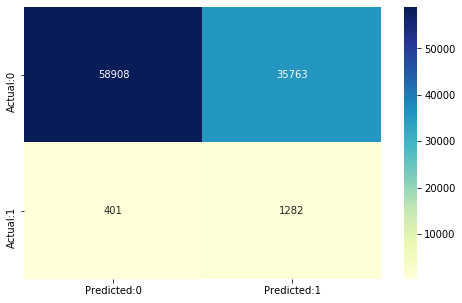

In [162]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [74]:
print(x_train_original.head())

                                         query_identifier query_word_count  \
165348                               Withheld for privacy                8   
295013                               Withheld for privacy                7   
200609  Tabtronics Android tablet Quantum X7 Compatibl...               12   
229412  Advent PSU part TEAC-48-122000VB Compatible Po...               10   
175835                               Withheld for privacy                9   

       query_char_count query_detected_language  organization_id  \
165348               55                      en                1   
295013               42                      en                1   
200609               83                      en                4   
229412               69                      en                4   
175835               69                      en                1   

       application_type             item_type  hour_request_received  \
165348  digital_library  academic_publication     

In [124]:
test = pd.read_csv('tcdml1920-rec-click-pred--test.csv')
# test = test[['query_identifier','query_word_count','query_char_count','query_detected_language','organization_id',
#                 'application_type','item_type','hour_request_received','country_by_ip','algorithm_class','search_title','search_keywords','search_abstract']]
test = test[['query_identifier','query_word_count','query_char_count','query_detected_language','organization_id',
                'application_type','item_type','hour_request_received','country_by_ip','algorithm_class','search_abstract']]
# print(test)

test = test.iloc[:9145,:]
# print(test)

new_df = x_train_original.copy()
print(new_df.head())
test = test.replace('\\N',np.nan)
clean_df = test.copy()

clean_df['query_identifier'].fillna('unknown', inplace=True)
#     print(clean_df['query_word_count'].isnull().sum())
clean_df['query_word_count'].fillna('unknown', inplace=True)
print(clean_df['query_word_count'].unique())
print(new_df['query_identifier'].unique())

clean_df['query_word_count'].isnull().sum()
#     print(clean_df['query_char_count'].isnull().sum())
clean_df['query_char_count'].fillna('unknown', inplace=True)
clean_df['query_char_count'].isnull().sum()
#     print(clean_df['country_by_ip'].isnull().sum())
clean_df['country_by_ip'].fillna('unknown', inplace=True)
clean_df['country_by_ip'].isnull().sum()
#     print(clean_df['query_detected_language'].isnull().sum())
clean_df['query_detected_language'] = clean_df.groupby(["country_by_ip"])['query_detected_language'].apply(lambda x: x.fillna(x.mode()[0]))
#     print(clean_df['query_detected_language'].isnull().sum())
clean_df['query_detected_language'].fillna('unknown', inplace=True)
clean_df[clean_df['query_detected_language'].isnull()]
#     print(clean_df['item_type'].isnull().sum())
clean_df['item_type'].fillna('unknown', inplace=True)
clean_df[clean_df['item_type'].isnull()]
#     print(clean_df['organization_id'].value_counts())

# Target Encoding
clean_df['query_identifier'] = clean_df['query_identifier'].map(new_df.groupby('query_identifier')['set_clicked'].mean())
clean_df['query_word_count'] = clean_df['query_word_count'].map(new_df.groupby('query_word_count')['set_clicked'].mean())
clean_df['query_char_count'] = clean_df['query_char_count'].map(new_df.groupby('query_char_count')['set_clicked'].mean())
clean_df['country_by_ip'] = clean_df['country_by_ip'].map(new_df.groupby('country_by_ip')['set_clicked'].mean())
clean_df['query_detected_language'] = clean_df['query_detected_language'].map(new_df.groupby('query_detected_language')['set_clicked'].mean())
clean_df['item_type'] = clean_df['item_type'].map(new_df.groupby('item_type')['set_clicked'].mean())
clean_df['hour_request_received'] = clean_df['hour_request_received'].map(new_df.groupby('hour_request_received')['set_clicked'].mean())
clean_df['application_type'] = clean_df['application_type'].map(new_df.groupby('application_type')['set_clicked'].mean())
clean_df['algorithm_class'] = clean_df['algorithm_class'].map(new_df.groupby('algorithm_class')['set_clicked'].mean())
# clean_df['search_title'] = clean_df['search_title'].map(new_df.groupby('search_title')['set_clicked'].mean())
# clean_df['search_keywords'] = clean_df['search_keywords'].map(new_df.groupby('search_keywords')['set_clicked'].mean())
clean_df['search_abstract'] = clean_df['search_abstract'].map(new_df.groupby('search_abstract')['set_clicked'].mean())
# clean_df['number_of_recs_in_set'] = clean_df['number_of_recs_in_set'].map(new_df.groupby('number_of_recs_in_set')['set_clicked'].mean())
clean_df['organization_id'] = clean_df['organization_id'].map(new_df.groupby('organization_id')['set_clicked'].mean())
print(clean_df.isnull().sum())


clean_df['query_identifier'].fillna(clean_df['query_identifier'].mean(), inplace=True)
clean_df['query_word_count'].fillna(clean_df['query_word_count'].mean(), inplace=True)
clean_df['query_char_count'].fillna(clean_df['query_char_count'].mean(), inplace=True)
clean_df['country_by_ip'].fillna(clean_df['country_by_ip'].mean(), inplace=True)
clean_df['query_detected_language'].fillna(clean_df['query_detected_language'].mean(), inplace=True)
clean_df['item_type'].fillna(clean_df['item_type'].mean(), inplace=True)
clean_df['hour_request_received'].fillna(clean_df['hour_request_received'].mean(), inplace=True)
clean_df['application_type'].fillna(clean_df['application_type'].mean(), inplace=True)
clean_df['algorithm_class'].fillna(clean_df['algorithm_class'].mean(), inplace=True)
# clean_df['search_title'].fillna(clean_df['search_title'].mean(), inplace=True)
# clean_df['search_keywords'].fillna(clean_df['search_keywords'].mean(), inplace=True)
clean_df['search_abstract'].fillna(clean_df['search_abstract'].mean(), inplace=True)
clean_df['organization_id'].fillna(clean_df['organization_id'].mean(), inplace=True)
# clean_df = clean_df

# clean_df = clean_df.iloc[:9145,:]
print(clean_df)

                                         query_identifier query_word_count  \
7929                                 Withheld for privacy                9   
179480  MXR Graphic EQ 10 Band EQ Compatible Power Sup...               10   
324626                               Withheld for privacy               19   
308964                               Withheld for privacy                6   
198096                               Withheld for privacy                5   

       query_char_count query_detected_language  organization_id  \
7929                 62                      en                1   
179480               62                      en                4   
324626              143                      en                1   
308964               52                      en                1   
198096               36                      en                1   

       application_type             item_type  hour_request_received  \
7929    digital_library  academic_publication     

In [125]:
answer_pred=logreg.predict(clean_df)
print(answer_pred)
answer_pred = pd.DataFrame(answer_pred,
            columns=['set_clicked'])
print(answer_pred['set_clicked'].value_counts())
dd = pd.read_csv('tcdml1920-rec-click-pred--submission file (example).csv')
dd = dd[['recommendation_set_id']]
result = pd.concat([dd, answer_pred], axis=1)
print(result)

[0 0 0 ... 0 0 0]
0    8328
1     817
Name: set_clicked, dtype: int64
      recommendation_set_id  set_clicked
0                     46914            0
1                     46961            0
2                     47012            0
3                     47181            0
4                     47240            0
5                     47269            0
6                     47271            0
7                     47349            0
8                     47380            0
9                     47494            0
10                    47517            0
11                    47535            0
12                    47706            0
13                    47853            0
14                    47980            0
15                    48114            0
16                    48155            0
17                    48198            0
18                    48299            0
19                    48305            0
20                    48323            0
21                    48361 

In [126]:
result = result.iloc[:9145,:]
result['recommendation_set_id'] = result['recommendation_set_id'].astype(int)
print(result.dtypes)
result.to_csv('tcdml1920-rec-click-pred--submission file.csv', encoding='utf-8', index=False)
print(result.head())
print(result['set_clicked'].value_counts())

recommendation_set_id    int32
set_clicked              int64
dtype: object
   recommendation_set_id  set_clicked
0                  46914            0
1                  46961            0
2                  47012            0
3                  47181            0
4                  47240            0
0    8328
1     817
Name: set_clicked, dtype: int64


In [25]:
import statsmodels.api as sm
import scipy.stats as st
from statsmodels.tools import add_constant as add_constant
new_df = featureEngineering(new_df)
new_df_constant = add_constant(new_df)
new_df_constant.head()

,const,query_identifier,query_word_count,query_char_count,query_detected_language,organization_id,application_type,item_type,hour_request_received,country_by_ip,algorithm_class,search_abstract,clicks,ctr,set_clicked
0,1.0,0.020442,0.023537,0.022727,0.017025,0.020442,0.02042,0.02042,0.018945,0.016245,0.018339,0.017444,0,0.0,0
1,1.0,0.020442,0.019262,0.019307,0.017025,0.020442,0.02042,0.02042,0.018945,0.020204,0.018339,0.017444,0,0.0,0
2,1.0,0.020442,0.022396,0.020767,0.017025,0.020442,0.02042,0.02042,0.018945,0.011666,0.018339,0.017444,0,0.0,0
3,1.0,0.020442,0.021412,0.014870,0.017025,0.020442,0.02042,0.02042,0.018945,0.016916,0.018339,0.017444,0,0.0,0
4,1.0,0.020442,0.021412,0.014870,0.017025,0.020442,0.02042,0.02042,0.018945,0.016916,0.018339,0.017444,0,0.0,0


In [202]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=new_df_constant.columns[:-3]
model=sm.Logit(new_df['set_clicked'],new_df_constant[cols])
result=model.fit()
result.summary()

         Current function value: 0.081679
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            set_clicked   No. Observations:               385655
Model:                          Logit   Df Residuals:                   385641
Method:                           MLE   Df Model:                           13
Date:                Fri, 08 Nov 2019   Pseudo R-squ.:                 0.07136
Time:                        02:12:41   Log-Likelihood:                -31500.
converged:                      False   LL-Null:                       -33920.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -81.1022     14.313     -5.667      0.000    -109.154     -53.050
query_identifier           14.1617      0.281     50.331      0.000      13.610      14.713
query_word_count           12.2260      3.114      3.926      0.000       6.122      18.330
query_char_count           29.9240      1.700     17.603      0.000      26.592      33.256
query_detected_language    29.1082      3.993      7.289      0.000      21.281      36.935
organization_id           -52.0175     13.846     -3.757      0.000     -79.156     -24.880
application_type           45.0770     11.323      3.981      0.000      22.885      67.269
item_type                  79.4932      6.966     11.412      0.000      65.841      93.145
hour_request_received      22.9470      8.645      2.654      0.008       6.003      39.891
country_by_ip              24.6549      1.096     22.487      0.000      22.506      26.804
algorithm_class            60.1767      6.271      9.597      0.000      47.887      72.467
search_title              -12.5740     12.157     -1.034      0.301     -36.401      11.253
search_keywords           -54.1559     90.907     -0.596      0.551    -232.331     124.019
search_abstract          4202.0080    814.118      5.161      0.000    2606.366    5797.650
===========================================================================================
"""

In [203]:
# To get more relevant features
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(new_df_constant,new_df['set_clicked'],cols)

In [204]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            set_clicked   No. Observations:               385655
Model:                          Logit   Df Residuals:                   385643
Method:                           MLE   Df Model:                           11
Date:                Fri, 08 Nov 2019   Pseudo R-squ.:                 0.07124
Time:                        02:15:36   Log-Likelihood:                -31504.
converged:                      False   LL-Null:                       -33920.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -87.1770     13.222     -6.593      0.000    -113.092     -61.262
query_identifier           14.1623      0.281     50.335      0.000      13.611      14.714
query_word_count           12.2418      3.115      3.930      0.000       6.136      18.347
query_char_count           29.9289      1.701     17.597      0.000      26.595      33.262
query_detected_language    29.1394      3.994      7.296      0.000      21.312      36.967
organization_id           -52.0647     13.839     -3.762      0.000     -79.190     -24.940
application_type           45.0938     11.320      3.984      0.000      22.907      67.280
item_type                  79.6193      6.962     11.436      0.000      65.973      93.265
hour_request_received      23.1025      8.645      2.672      0.008       6.159      40.046
country_by_ip              24.6525      1.097     22.482      0.000      22.503      26.802
algorithm_class            55.9328      5.847      9.566      0.000      44.472      67.393
search_abstract          4487.2404    758.114      5.919      0.000    3001.363    5973.117
===========================================================================================
"""